In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
# Đọc dữ liệu
df = pd.read_csv("C:\\Users\\phamt\\Downloads\\cleaning_data.csv")

In [10]:
# Tách đặc trưng (X) và mục tiêu (y)
X = df.drop('Patron Type Definition', axis=1)  # Giả sử 'Patron Type Definition' là cột mục tiêu
y = df['Patron Type Definition']               #giá trị mà mô hình sẽ cố gắng dự đoán dựa trên các đặc trưng trong X

# Mã hóa cột mục tiêu nếu là phân loại ['Adult', 'Senior', 'Teen','Juvenile'] -> [0,1,2,3]
label_encoder = LabelEncoder()                   
y_encoded = label_encoder.fit_transform(y)

# Xác định loại đặc trưng
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [11]:
# Đối với dữ liệu số: Chuẩn hóa các giá trị bằng StandardScaler().
# Đối với dữ liệu phân loại: Áp dụng One-Hot Encoding để chuyển các giá trị phân loại thành các cột nhị phân.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())  # Chuẩn hóa (scaling) dữ liệu số.
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encoding cho dữ liệu phân loại
        ]), categorical_features)
    ]
)


In [12]:
# Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Tiến hành xử lý dữ liệu
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [13]:
# Chọn mô hình hồi quy tuyến tính
reg_model = LinearRegression()

# Thực hiện cross-validation cho mô hình hồi quy tuyến tính
reg_cv_scores = cross_val_score(reg_model, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold cross-validation với MSE
print(f"Cross-validation MSE scores for Linear Regression: {-reg_cv_scores}")
print(f"Mean cross-validation MSE for Linear Regression: {-reg_cv_scores.mean():.4f}")

# Huấn luyện mô hình hồi quy tuyến tính với tập huấn luyện đầy đủ
reg_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_reg = reg_model.predict(X_test_transformed)

# Đánh giá mô hình hồi quy tuyến tính
mse_reg = mean_squared_error(y_test, y_pred_reg)
mae_reg = mean_absolute_error(y_test, y_pred_reg)

# In kết quả cho mô hình hồi quy tuyến tính
print(f"Linear Regression Mean Squared Error: {mse_reg:.4f}")
print(f"Linear Regression Mean Absolute Error: {mae_reg:.4f}")

Cross-validation MSE scores for Linear Regression: [0.01585176 0.01889197 0.01663999 0.01833277 0.01936858]
Mean cross-validation MSE for Linear Regression: 0.0178
Linear Regression Mean Squared Error: 0.0175
Linear Regression Mean Absolute Error: 0.0523




Mức độ ổn định: Các giá trị MSE dao động trong khoảng từ 0.0158 đến 0.0193. Điều này cho thấy mô hình có sự ổn định nhất định trong việc dự đoán trên các tập dữ liệu khác nhau, với mức sai số không quá chênh lệch.

MSE từ cross-validation là 0.0178 - Trung bình sai số bình phương giữa giá trị thực tế và giá trị dự đoán của mô hình. Giá trị thấp cho thấy mô hình dự đoán tương đối chính xác

Giá trị MSE trên tập kiểm thử là 0.0175 - Giá trị này khá gần với MSE trung bình từ cross-validation (0.0178), chứng tỏ mô hình không bị overfitting hay underfitting và hoạt động tốt trên dữ liệu chưa từng thấy

MAE là 0.0523 :  sai số trung bình nhỏ hơn 0.1, mô hình đang dự đoán khá chính xác

In [14]:
# Chọn mô hình kNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Sử dụng k=5, bạn có thể tùy chỉnh giá trị này

# Thực hiện cross-validation cho mô hình kNN
knn_cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='accuracy')  # Sử dụng 5-fold cross-validation
print(f"Cross-validation accuracy scores for kNN: {knn_cv_scores}")
print(f"Mean cross-validation accuracy for kNN: {knn_cv_scores.mean():.4f}")

# Huấn luyện mô hình kNN với tập huấn luyện đầy đủ
knn_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_knn = knn_model.predict(X_test_transformed)

# Đánh giá mô hình phân loại kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng

# In kết quả cho mô hình kNN
print(f"kNN Accuracy: {accuracy_knn:.4f}")
print(f"kNN Precision: {precision_knn:.4f}")
print(f"kNN Recall: {recall_knn:.4f}")
print(f"kNN F1-Score: {f1_knn:.4f}")

Cross-validation accuracy scores for kNN: [0.99000975 0.9920809  0.99025341 0.99098331 0.98927745]
Mean cross-validation accuracy for kNN: 0.9905
kNN Accuracy: 0.9923
kNN Precision: 0.9924
kNN Recall: 0.9923
kNN F1-Score: 0.9923


Hiệu suất cao: Với accuracy, precision, recall, và F1-score đều đạt trên 99%

Mức độ ổn định: Các giá trị dao động trong một phạm vi rất nhỏ (khoảng từ 0.9893 đến 0.9921)

Accuracy trên tập kiểm thử cao hơn một chút so với giá trị trung bình từ cross-validation, cho thấy mô hình tổng quát hóa tốt và không bị overfitting.

In [15]:
# Chọn mô hình phân loại: SVM
svm_model = SVC()

# Thực hiện cross-validation cho mô hình SVM
svm_cv_scores = cross_val_score(svm_model, X_train_transformed, y_train, cv=5, scoring='accuracy')  # Sử dụng 5-fold cross-validation
print(f"Cross-validation accuracy scores for SVM: {svm_cv_scores}")
print(f"Mean cross-validation accuracy for SVM: {svm_cv_scores.mean():.4f}")

# Huấn luyện mô hình SVM với tập huấn luyện đầy đủ
svm_model.fit(X_train_transformed, y_train)

# Dự đoán trên tập kiểm thử
y_pred_svm = svm_model.predict(X_test_transformed)

# Đánh giá mô hình phân loại SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')  # 'weighted' để xử lý dữ liệu mất cân bằng

# In kết quả cho mô hình SVM
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1-Score: {f1_svm:.4f}")

Cross-validation accuracy scores for SVM: [1.         0.99987817 1.         1.         1.        ]
Mean cross-validation accuracy for SVM: 1.0000
SVM Accuracy: 1.0000
SVM Precision: 1.0000
SVM Recall: 1.0000
SVM F1-Score: 1.0000


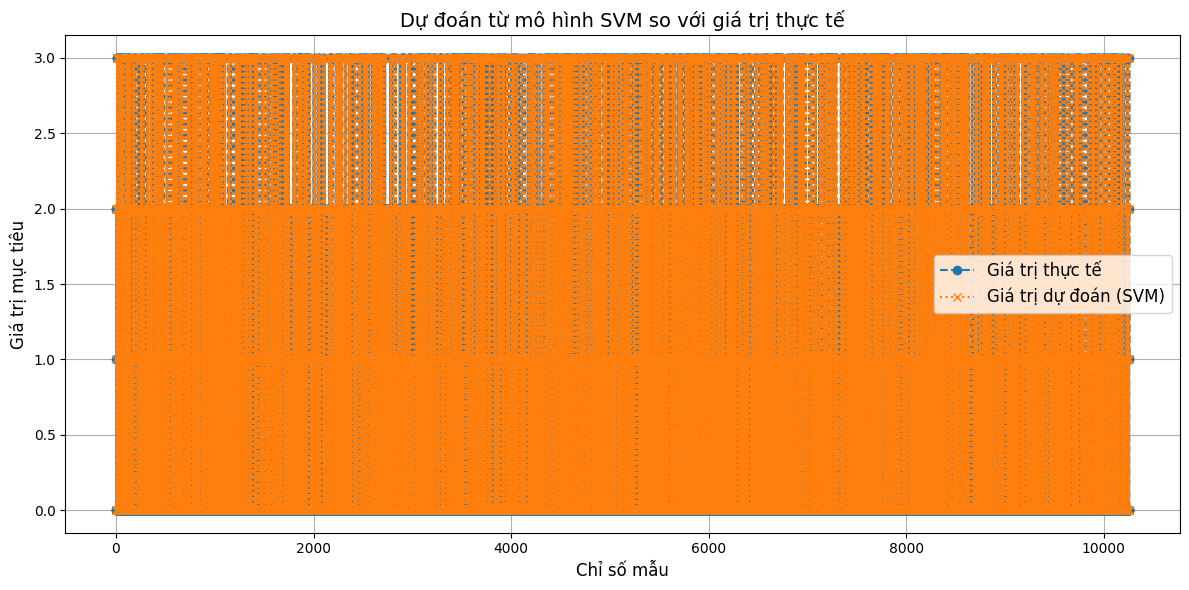

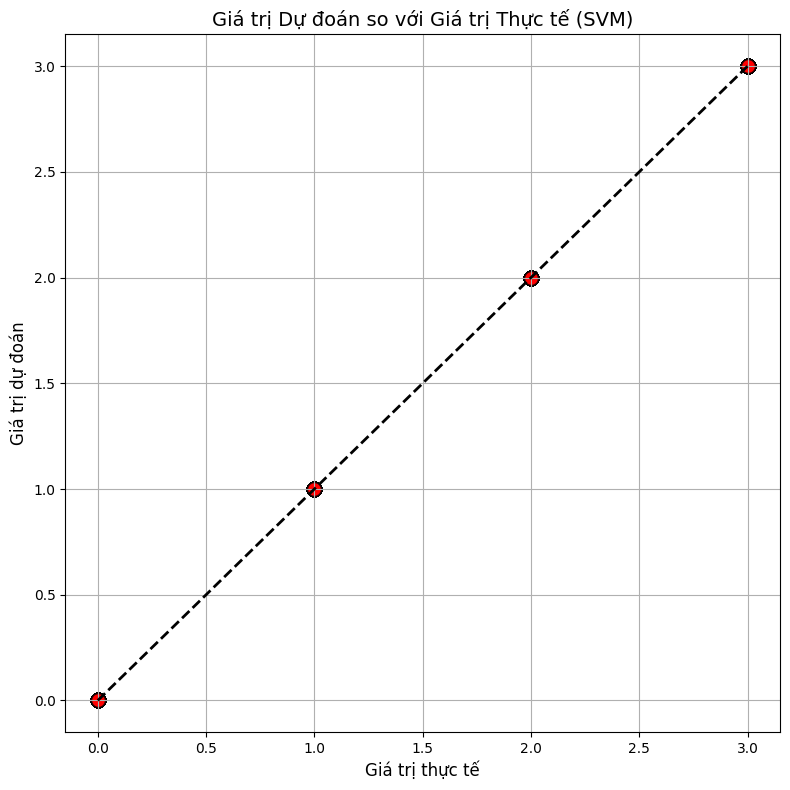

In [17]:
# Vẽ biểu đồ đường
model_name = "SVM"
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='#1f77b4', marker='o', linestyle='dashed', markersize=6)
plt.plot(y_pred_svm, label=f'Giá trị dự đoán ({model_name})', color='#ff7f0e', marker='x', linestyle='dotted', markersize=6)
plt.xlabel('Chỉ số mẫu', fontsize=12)
plt.ylabel('Giá trị mục tiêu', fontsize=12)
plt.title(f'Dự đoán từ mô hình {model_name} so với giá trị thực tế', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svm, color='red', alpha=0.6, edgecolors='k', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Đường chéo thể hiện sự hoàn hảo
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.title(f'Giá trị Dự đoán so với Giá trị Thực tế ({model_name})', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

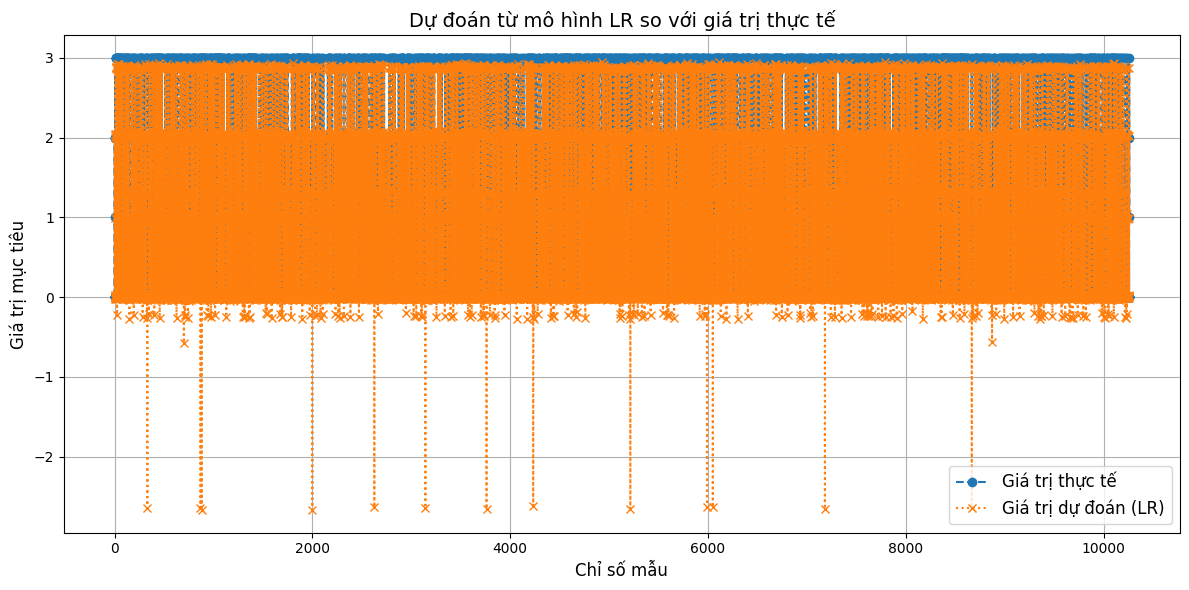

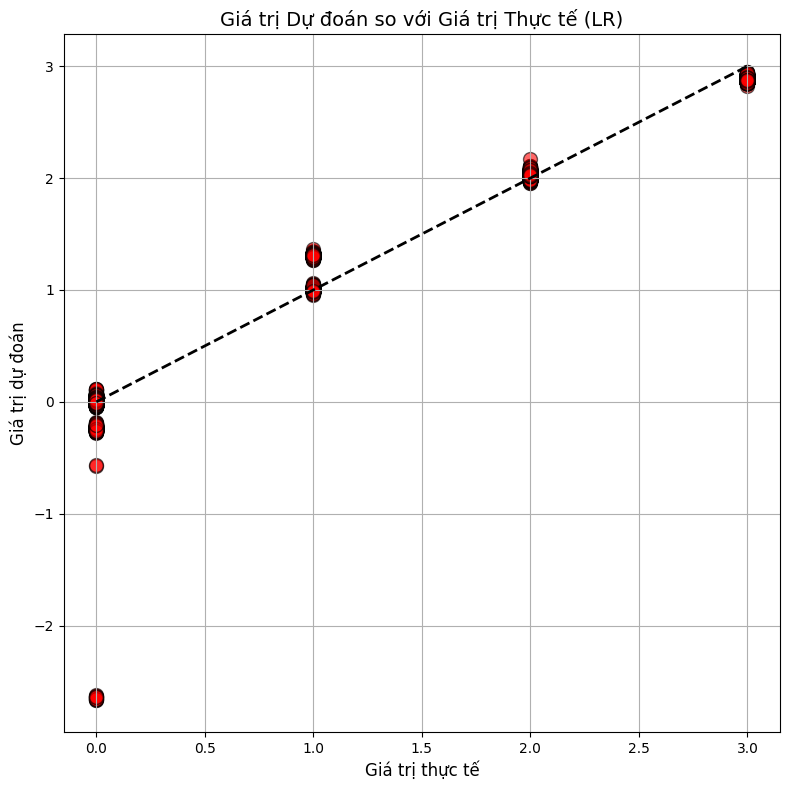

In [19]:
# Vẽ biểu đồ đường
model_name = "LR"
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='#1f77b4', marker='o', linestyle='dashed', markersize=6)
plt.plot(y_pred_reg, label=f'Giá trị dự đoán ({model_name})', color='#ff7f0e', marker='x', linestyle='dotted', markersize=6)
plt.xlabel('Chỉ số mẫu', fontsize=12)
plt.ylabel('Giá trị mục tiêu', fontsize=12)
plt.title(f'Dự đoán từ mô hình {model_name} so với giá trị thực tế', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_reg, color='red', alpha=0.6, edgecolors='k', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Đường chéo thể hiện sự hoàn hảo
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.title(f'Giá trị Dự đoán so với Giá trị Thực tế ({model_name})', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

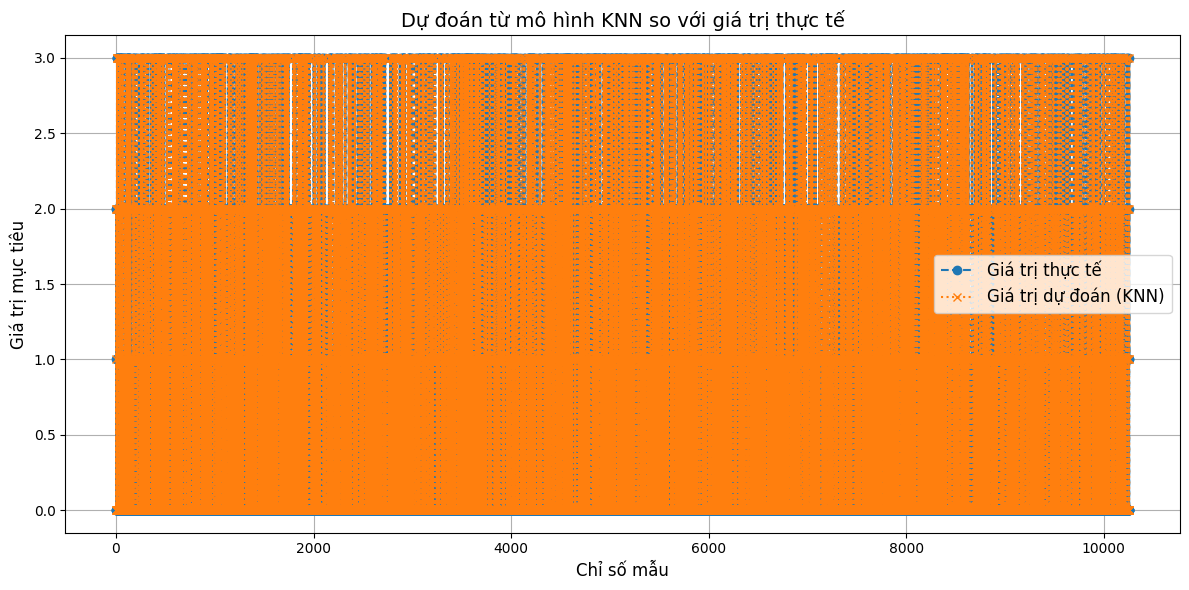

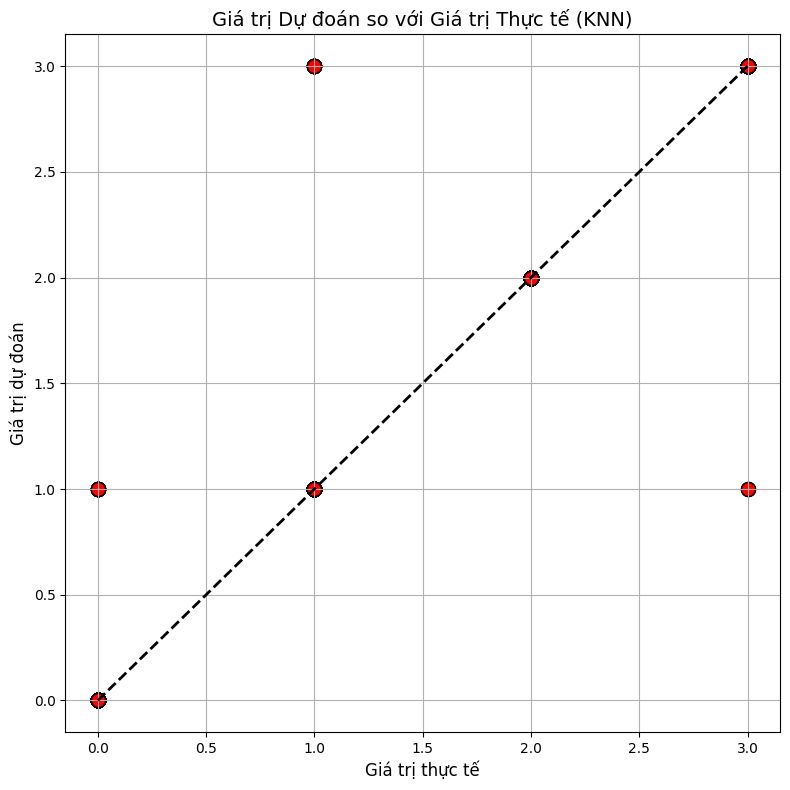

In [20]:
# Vẽ biểu đồ đường
model_name = "KNN"
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='#1f77b4', marker='o', linestyle='dashed', markersize=6)
plt.plot(y_pred_knn, label=f'Giá trị dự đoán ({model_name})', color='#ff7f0e', marker='x', linestyle='dotted', markersize=6)
plt.xlabel('Chỉ số mẫu', fontsize=12)
plt.ylabel('Giá trị mục tiêu', fontsize=12)
plt.title(f'Dự đoán từ mô hình {model_name} so với giá trị thực tế', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ phân tán
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_knn, color='red', alpha=0.6, edgecolors='k', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Đường chéo thể hiện sự hoàn hảo
plt.xlabel('Giá trị thực tế', fontsize=12)
plt.ylabel('Giá trị dự đoán', fontsize=12)
plt.title(f'Giá trị Dự đoán so với Giá trị Thực tế ({model_name})', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()